# EDA for eCommerce Transactions 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv('C:/Users/Tashm/Datasets/Zeotap_DS_Assignment/Customers.csv')
products_df = pd.read_csv('C:/Users/Tashm/Datasets/Zeotap_DS_Assignment/Products.csv')
transactions_df = pd.read_csv('C:/Users/Tashm/Datasets/Zeotap_DS_Assignment/Transactions.csv')

In [3]:
customers_df.info()
customers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions_df.info()
transactions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [7]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [8]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [9]:
(customers_df['SignupDate'].head(),
transactions_df['TransactionDate'].head())

(0    2022-07-10
 1    2022-02-13
 2    2024-03-07
 3    2022-10-09
 4    2022-08-15
 Name: SignupDate, dtype: object,
 0    2024-08-25 12:38:23
 1    2024-05-27 22:23:54
 2    2024-04-25 07:38:55
 3    2024-03-26 22:55:37
 4    2024-03-21 15:10:10
 Name: TransactionDate, dtype: object)

In [10]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [11]:
(customers_df['SignupDate'].head(),
transactions_df['TransactionDate'].head())

(0   2022-07-10
 1   2022-02-13
 2   2024-03-07
 3   2022-10-09
 4   2022-08-15
 Name: SignupDate, dtype: datetime64[ns],
 0   2024-08-25 12:38:23
 1   2024-05-27 22:23:54
 2   2024-04-25 07:38:55
 3   2024-03-26 22:55:37
 4   2024-03-21 15:10:10
 Name: TransactionDate, dtype: datetime64[ns])

In [12]:
(customers_df.isnull().sum(),
products_df.isnull().sum(),
transactions_df.isnull().sum())


(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

# Bussiness Insights

### 1. Customer distribution by region

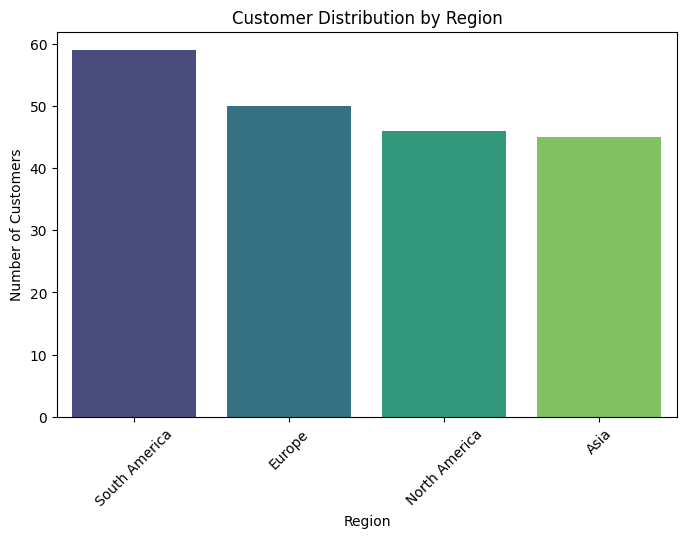

In [13]:
region_counts = customers_df['Region'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=region_counts.index,
    y=region_counts.values,
    hue=region_counts.index,  
    palette="viridis",
    dodge=False, 
    legend=False  
)

plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


### 2. Top 5 most purchased product categories

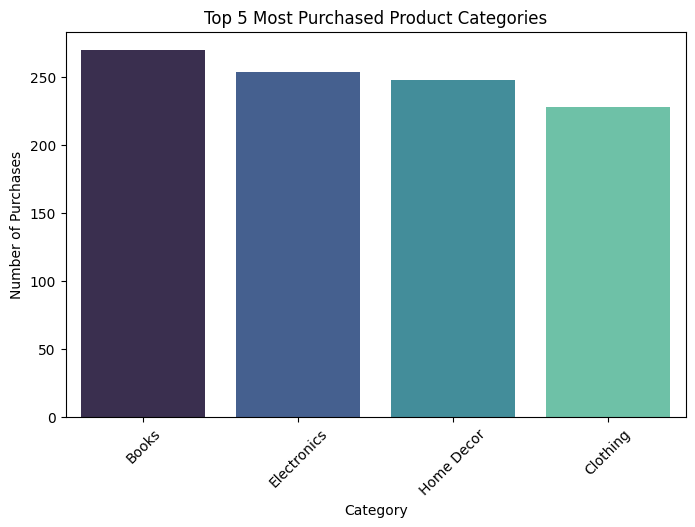

In [14]:
category_counts = transactions_df.merge(products_df, on="ProductID")['Category'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=category_counts.index, 
    y=category_counts.values, 
    hue=category_counts.index,
    palette="mako",
    dodge=False,
    legend=False  
)

plt.title("Top 5 Most Purchased Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

### 3. Monthly transaction trend

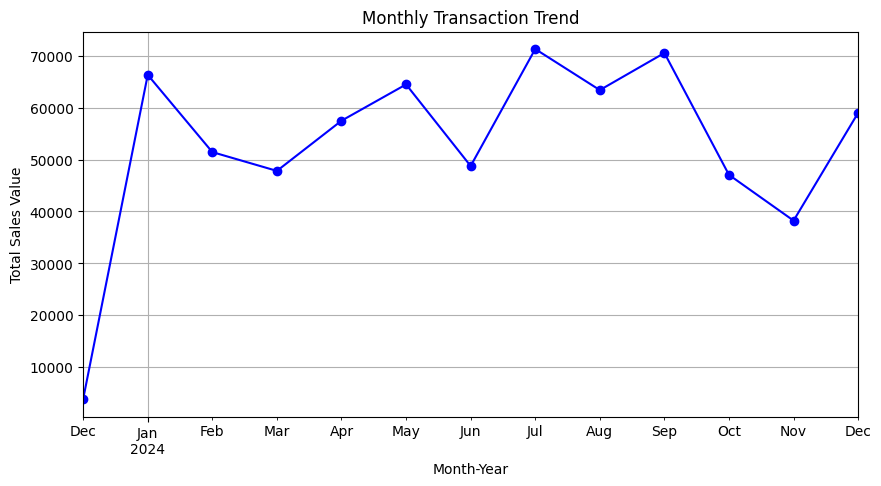

In [15]:
transactions_df['MonthYear'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('MonthYear')['TotalValue'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Transaction Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Value")
plt.grid(True)
plt.show()

### 4. Top 5 customers by transaction value

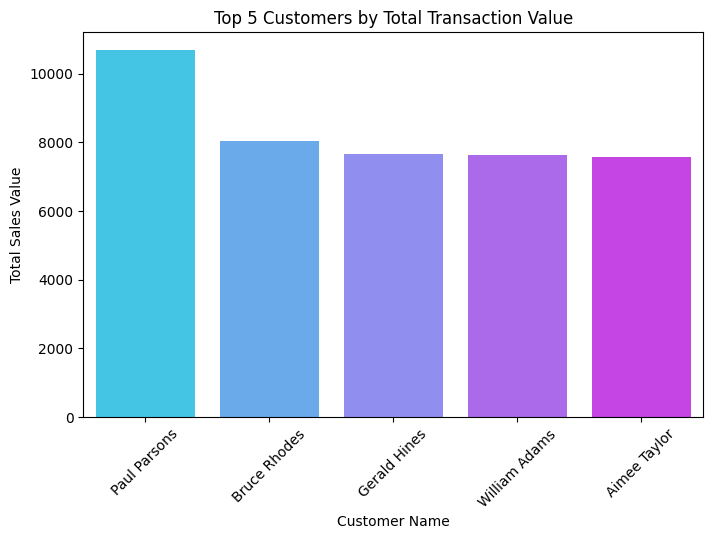

In [16]:
customer_sales = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
top_customers = customer_sales.index.map(customers_df.set_index('CustomerID')['CustomerName'])

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_customers, 
    y=customer_sales.values, 
    hue=top_customers,
    palette="cool",
    dodge=False,
    legend=False 
)

plt.title("Top 5 Customers by Total Transaction Value")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.show()

### 5. Average sales value per transaction

In [17]:
average_transaction_value = transactions_df['TotalValue'].mean()
print(f"Average Sales Value Per Transaction: {average_transaction_value}")

Average Sales Value Per Transaction: 689.9955600000001


### 6. Product Performance Analysis

In [18]:
# Merge transactions with products
product_sales = transactions_df.merge(products_df, on='ProductID')

# Calculate total sales and quantity sold per product
product_performance = product_sales.groupby('ProductID').agg(
    TotalRevenue=('TotalValue', 'sum'),
    QuantitySold=('Quantity', 'sum')
).reset_index()

# Identify underperforming products (below the 25th percentile in sales)
threshold = product_performance['TotalRevenue'].quantile(0.25)
underperforming_products = product_performance[product_performance['TotalRevenue'] < threshold]
print(underperforming_products)


   ProductID  TotalRevenue  QuantitySold
2       P003       1367.72            31
3       P004       1722.42            18
7       P008       2790.15            19
11      P012       2394.00            15
13      P014        367.64            14
14      P015       2860.74            18
25      P026       1223.22            19
30      P031       1767.60             9
32      P033       1413.50            22
34      P035        795.34            26
43      P044        244.66            13
50      P051       1694.16            26
53      P054       2635.80            46
55      P056        337.68            21
59      P060       2023.45            13
62      P063        839.75            25
68      P069       2419.44            24
69      P070        730.35            15
70      P071       2547.20            20
72      P073        647.76            24
77      P078       1070.68            26
80      P081       2188.56            33
81      P082       1063.81            19
89      P090    

### 7. Customer Retention Metrics

In [19]:
# Calculate repeat purchases
repeat_customers = transactions_df.groupby('CustomerID')['TransactionID'].count()
retention_rate = (repeat_customers > 1).mean() * 100
print(f"Retention Rate: {retention_rate:.2f}%")

# Calculate average time between purchases
transactions_df = transactions_df.sort_values(by=['CustomerID', 'TransactionDate'])
transactions_df['PrevTransaction'] = transactions_df.groupby('CustomerID')['TransactionDate'].shift()
transactions_df['PurchaseGap'] = (transactions_df['TransactionDate'] - transactions_df['PrevTransaction']).dt.days
avg_gap = transactions_df['PurchaseGap'].mean()
print(f"Average Days Between Purchases: {avg_gap:.2f}")


Retention Rate: 93.97%
Average Days Between Purchases: 55.38
